# Import Cell

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the Data and Read the .csv File

In [173]:
df = pd.read_csv("salary_results.csv")

#### Display the first few rows of the dataset

In [174]:
df.shape

(305, 8)

In [175]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Title,Location,Description,nTile10,nTile25,nTile50,nTile75,nTile90
0,Senior Accountant,"New York, NY",The Senior Accountant ensures the accuracy of ...,88094,97290,107390,118890,129360
1,Senior Accountant,"Los Angeles, CA",The Senior Accountant ensures the accuracy of ...,83959,92790,102490,113390,123314
2,Senior Accountant,"Chicago, IL",The Senior Accountant ensures the accuracy of ...,79105,87390,96490,106790,116168
3,Senior Accountant,"Houston, TX",The Senior Accountant ensures the accuracy of ...,75478,83490,92290,102090,111012
4,Senior Accountant,"Phoenix, AZ",The Senior Accountant ensures the accuracy of ...,74460,82290,90890,100590,109421


#### Summarize the dataset structure

In [176]:
print("\nDataset structure and data types:")
df.info()


Dataset structure and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        305 non-null    object
 1   Location     305 non-null    object
 2   Description  305 non-null    object
 3   nTile10      305 non-null    int64 
 4   nTile25      305 non-null    int64 
 5   nTile50      305 non-null    int64 
 6   nTile75      305 non-null    int64 
 7   nTile90      305 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 19.2+ KB


#### Generate summary statistics for numerical columns

In [177]:
print("\nSummary statistics for numerical columns:")
print(df.describe())



Summary statistics for numerical columns:
            nTile10        nTile25        nTile50        nTile75  \
count    305.000000     305.000000     305.000000     305.000000   
mean   76261.695082   84264.426230   93054.262295  103006.393443   
std     6251.662601    6904.599088    7622.119917    8435.727988   
min    64762.000000   71590.000000   79090.000000   87590.000000   
25%    71533.000000   79090.000000   87390.000000   96690.000000   
50%    74460.000000   82290.000000   90890.000000  100590.000000   
75%    80823.000000   89290.000000   98590.000000  109090.000000   
max    94566.000000  104490.000000  115390.000000  127790.000000   

             nTile90  
count     305.000000  
mean   112067.239344  
std      9176.723348  
min     95329.000000  
25%    105157.000000  
50%    109421.000000  
75%    118650.000000  
max    139080.000000  


#### Check for missing values

In [178]:
print("\nMissing values in each column:")
print(df.isnull().sum())  ## or df.isna().sum()


Missing values in each column:
Title          0
Location       0
Description    0
nTile10        0
nTile25        0
nTile50        0
nTile75        0
nTile90        0
dtype: int64


### Check for duplicate rows

In [179]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


#### Unique Values

In [180]:
print("Unique job titles:")
print(df['Title'].nunique(), "unique titles")
print("\nUnique locations:")
print(df['Location'].nunique(), "unique locations")

Unique job titles:
1 unique titles

Unique locations:
305 unique locations


#### Value Count

In [181]:
print("\nMost common job titles:")
print(df['Title'].value_counts().head())

print("\nMost common locations:")
print(df['Location'].value_counts().head())



Most common job titles:
Title
Senior Accountant    305
Name: count, dtype: int64

Most common locations:
Location
New York, NY            1
Sterling Heights, MI    1
Elizabeth, NJ           1
Concord, CA             1
Stamford, CT            1
Name: count, dtype: int64


#### Correlation Matrix


Correlation matrix:
          nTile10   nTile25   nTile50   nTile75   nTile90
nTile10  1.000000  0.999981  0.999932  0.999947  0.999942
nTile25  0.999981  1.000000  0.999985  0.999985  0.999970
nTile50  0.999932  0.999985  1.000000  0.999988  0.999963
nTile75  0.999947  0.999985  0.999988  1.000000  0.999993
nTile90  0.999942  0.999970  0.999963  0.999993  1.000000


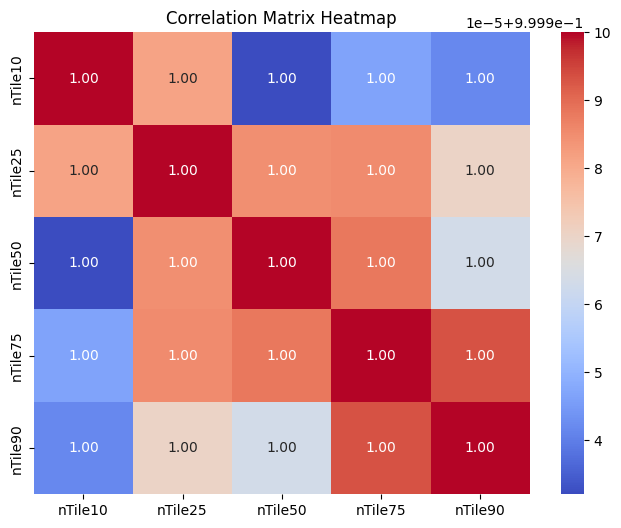

In [182]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Data Cleaning

#### Handle Missing Values

In [183]:
print("\nMissing values per column:")
print(df.isna().sum())

# Example: Drop rows with missing values
clean_df = df.dropna()


Missing values per column:
Title          0
Location       0
Description    0
nTile10        0
nTile25        0
nTile50        0
nTile75        0
nTile90        0
dtype: int64


In [184]:
# Or fill missing values

#clean_df = df.fillna(method='ffill')  # Forward fill

#### Handle Duplicates

In [185]:
print("\nNumber of duplicate rows:")
print(clean_df.duplicated().sum())

# Drop duplicates
clean_df = clean_df.drop_duplicates()



Number of duplicate rows:
0


#### Standardize Text Data

In [186]:
clean_df['Title'] = clean_df['Title'].str.strip().str.title()
clean_df['Location'] = clean_df['Location'].str.strip().str.title()

#### Verify Data Types

In [187]:
print("\nColumn data types:")
print(clean_df.dtypes)

# Convert salary percentiles to numeric if needed
percentiles = ['nTile10', 'nTile25', 'nTile50', 'nTile75', 'nTile90']
clean_df[percentiles] = clean_df[percentiles].apply(pd.to_numeric, errors='coerce')



Column data types:
Title          object
Location       object
Description    object
nTile10         int64
nTile25         int64
nTile50         int64
nTile75         int64
nTile90         int64
dtype: object


 #### Address Outliers

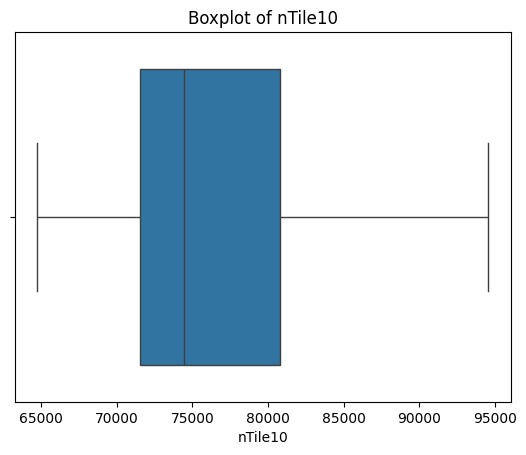

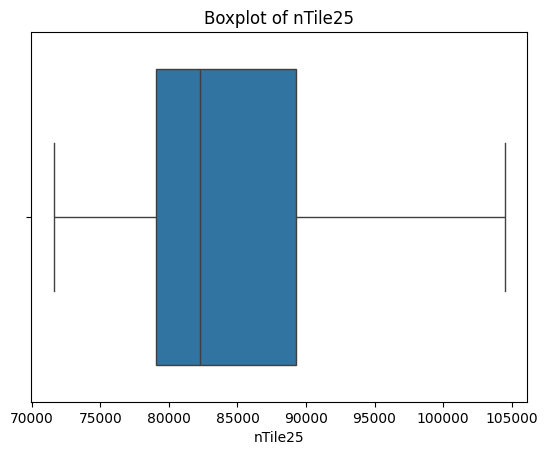

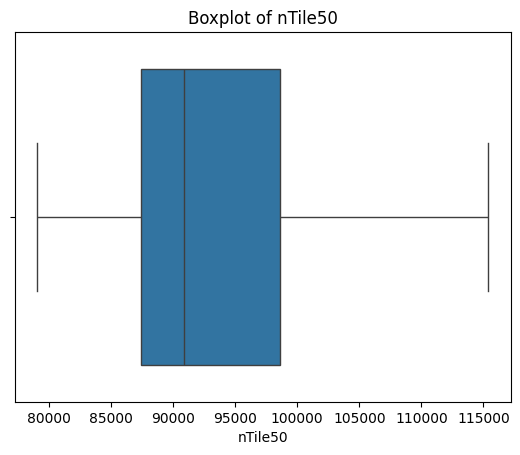

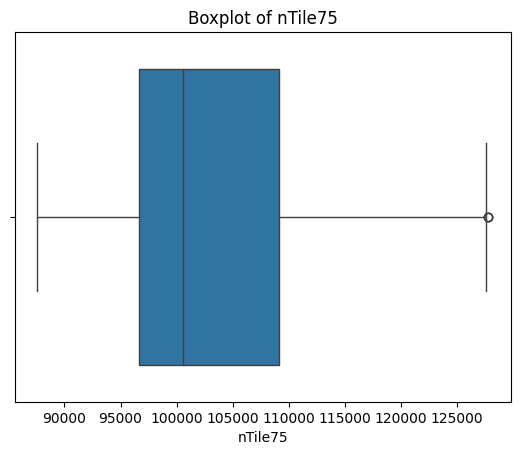

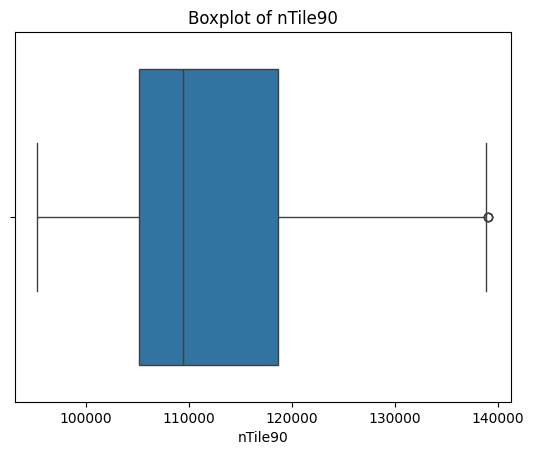

In [188]:
for col in percentiles:
    sns.boxplot(x=clean_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### Ensure Column Consistency


In [189]:
clean_df.rename(columns={'Title': 'Job Title', 'Location': 'Job Location', 'Description': 'Job Description'}, inplace=True)

In [190]:
clean_df.head()

,Job Title,Job Location,Job Description,nTile10,nTile25,nTile50,nTile75,nTile90
0,Senior Accountant,"New York, Ny",The Senior Accountant ensures the accuracy of ...,88094,97290,107390,118890,129360
1,Senior Accountant,"Los Angeles, Ca",The Senior Accountant ensures the accuracy of ...,83959,92790,102490,113390,123314
2,Senior Accountant,"Chicago, Il",The Senior Accountant ensures the accuracy of ...,79105,87390,96490,106790,116168
3,Senior Accountant,"Houston, Tx",The Senior Accountant ensures the accuracy of ...,75478,83490,92290,102090,111012
4,Senior Accountant,"Phoenix, Az",The Senior Accountant ensures the accuracy of ...,74460,82290,90890,100590,109421


* Notice, the data that we've scraped is very clean

#### Distribution Analysis

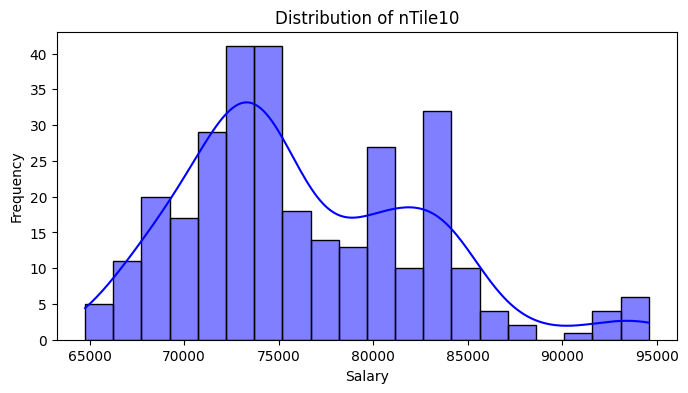

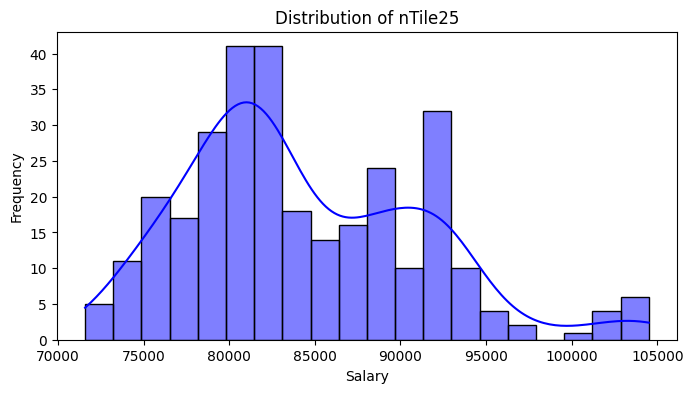

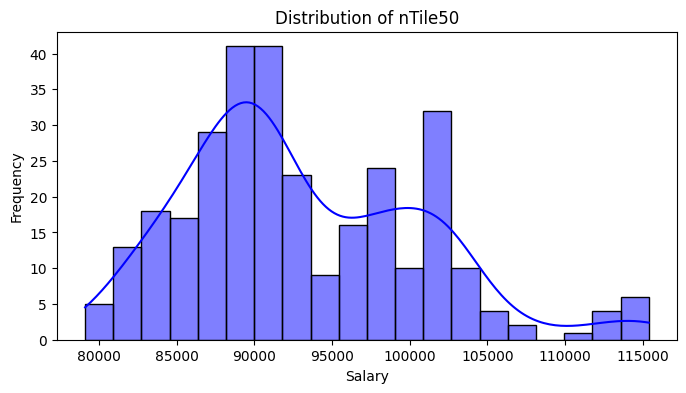

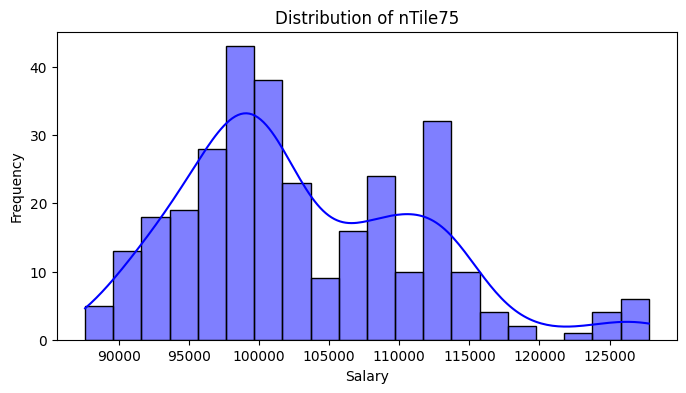

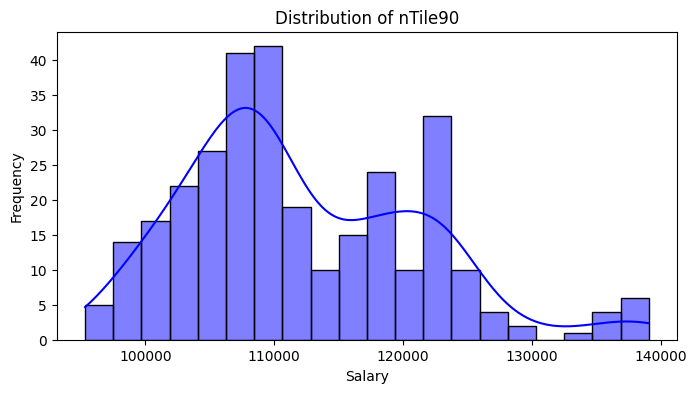

In [191]:
# List of salary percentiles
percentiles = ['nTile10', 'nTile25', 'nTile50', 'nTile75', 'nTile90']

for col in percentiles:
    plt.figure(figsize=(8,4))
    sns.histplot(clean_df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()


#### Relationship Analysis


Correlation matrix:
          nTile10   nTile25   nTile50   nTile75   nTile90
nTile10  1.000000  0.999981  0.999932  0.999947  0.999942
nTile25  0.999981  1.000000  0.999985  0.999985  0.999970
nTile50  0.999932  0.999985  1.000000  0.999988  0.999963
nTile75  0.999947  0.999985  0.999988  1.000000  0.999993
nTile90  0.999942  0.999970  0.999963  0.999993  1.000000


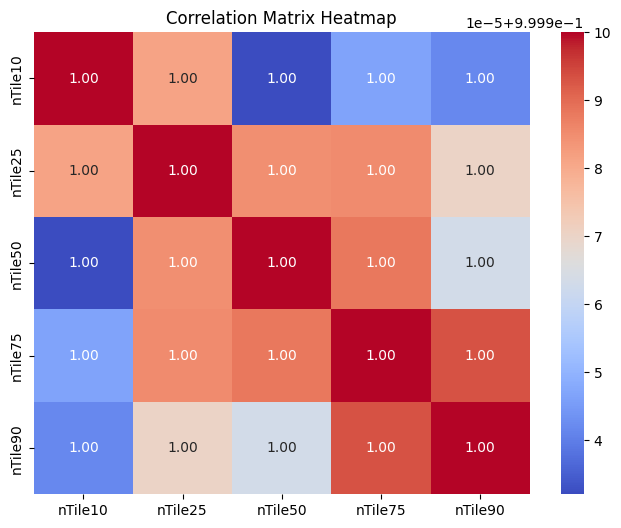

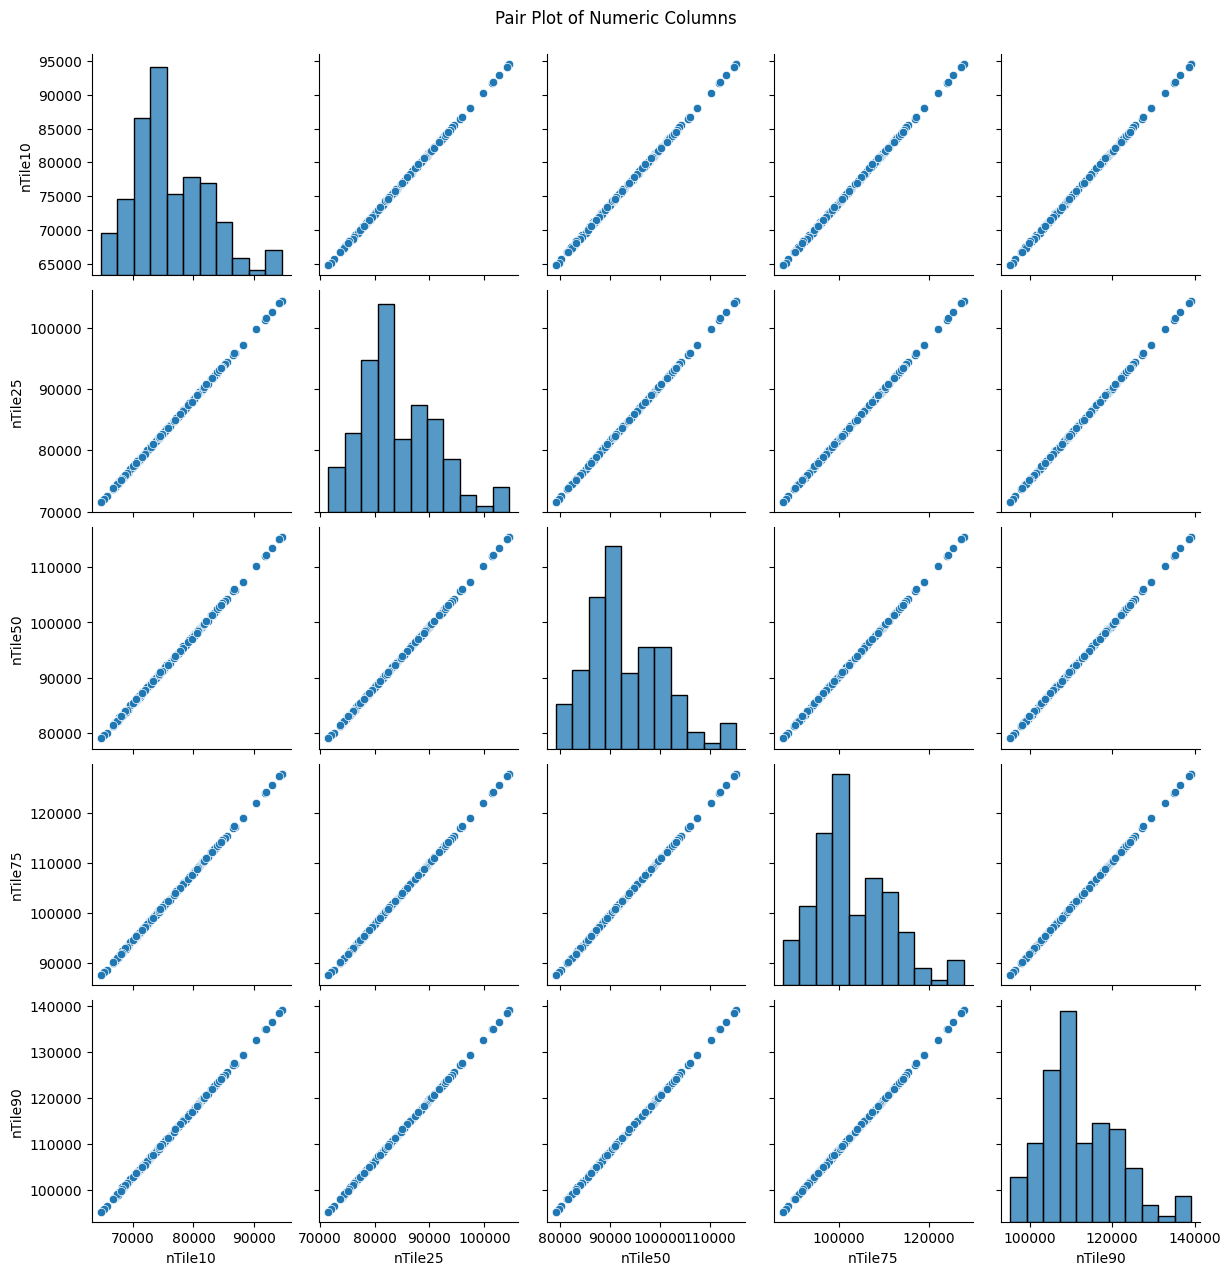

In [192]:

# Select only numerical columns for correlation analysis
numerical_columns = clean_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Pair Plot for Relationship Exploration
sns.pairplot(clean_df[percentiles])  
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)  
plt.show()


## Segmentation Analysis

#### Grouping Data by a Categorical Column

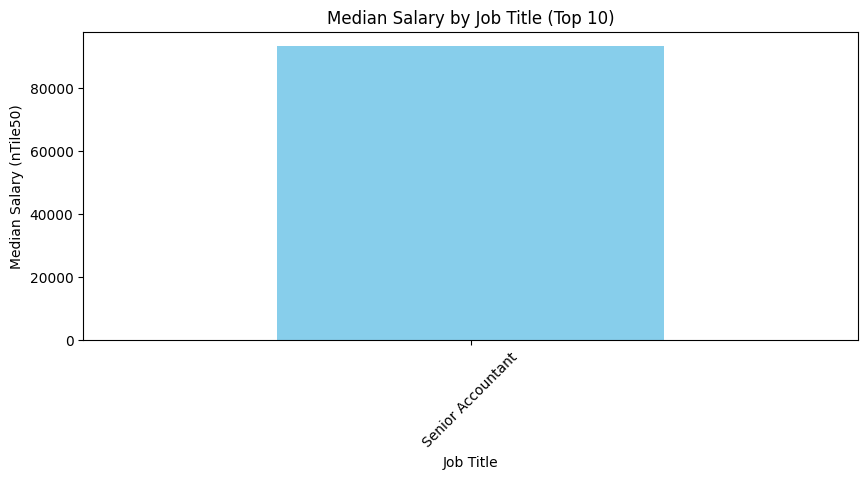

In [193]:
# Grouping
grouped_data = clean_df.groupby('Job Title')[percentiles].mean().sort_values(by='nTile50', ascending=False) 

# Visualizing segmented data
plt.figure(figsize=(10, 4))
grouped_data['nTile50'].head(10).plot(kind='bar', color='skyblue') 
plt.title("Median Salary by Job Title (Top 10)")
plt.xlabel("Job Title")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


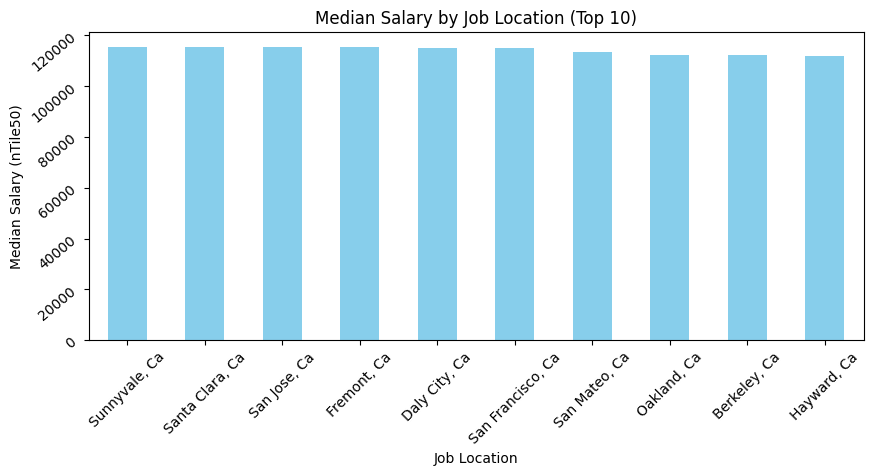

In [194]:
# Grouping
grouped_data = clean_df.groupby('Job Location')[percentiles].mean().sort_values(by='nTile50', ascending=False) 

# Visualizing segmented data
plt.figure(figsize=(10, 4))
grouped_data['nTile50'].head(10).plot(kind='bar', color='skyblue') 
plt.title("Median Salary by Job Location (Top 10)")
plt.xlabel("Job Location")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

#### Comparison of Numeric Data Across Categories


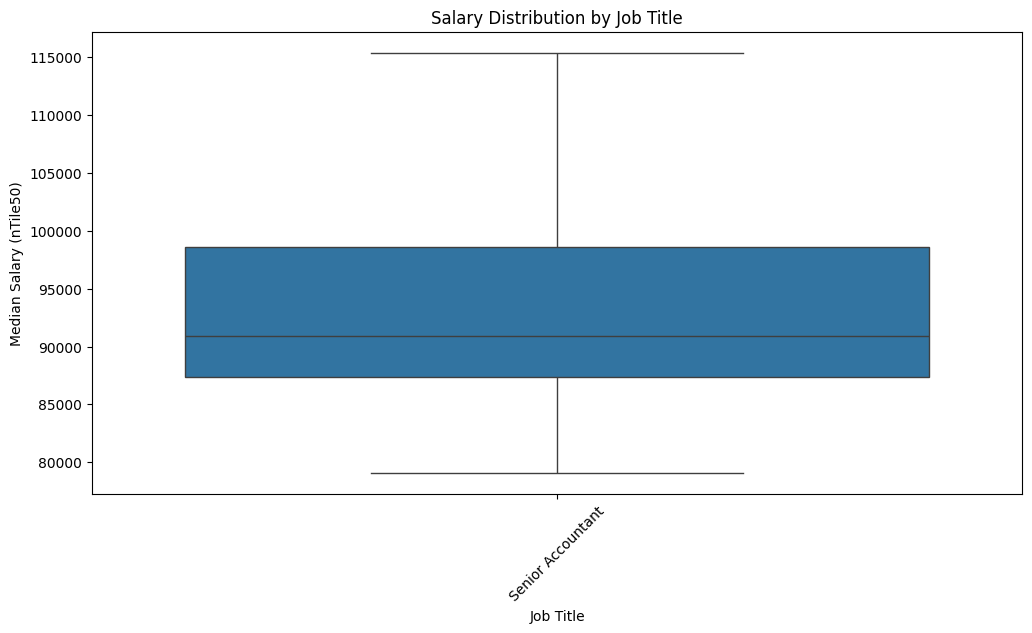

In [195]:
# Boxplot for salary percentiles across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='nTile50', data=clean_df) 
plt.title("Salary Distribution by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


In [196]:
top_10_locations = clean_df['Job Location'].value_counts().head(10).index
filtered_data = clean_df[clean_df['Job Location'].isin(top_10_locations)]


#### Bar Plot for Top 10 Locations

Job Location
Santa Clara, Ca         115390.0
New York, Ny            107390.0
Stamford, Ct            105590.0
Elizabeth, Nj           103890.0
Concord, Ca             103290.0
New Haven, Ct            99190.0
Kent, Wa                 98690.0
Sterling Heights, Mi     92390.0
Round Rock, Tx           90690.0
Columbia, Sc             85290.0
Name: nTile50, dtype: float64


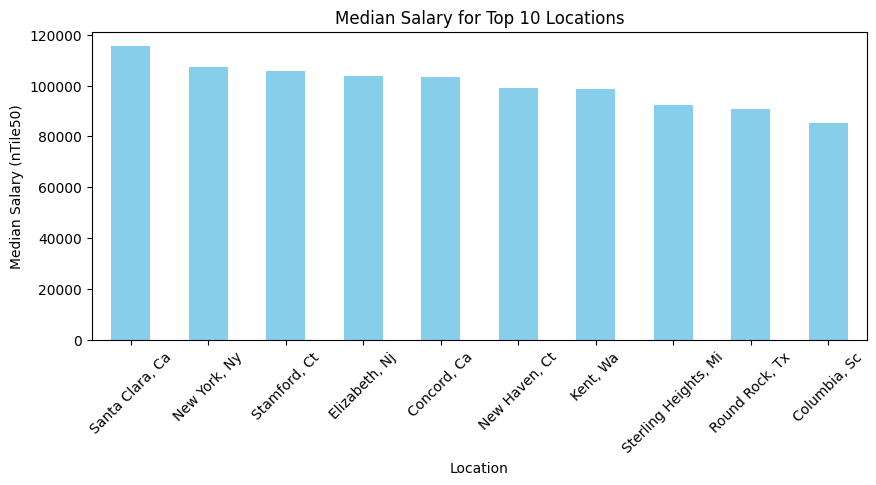

In [197]:
# identifies the 10 most frequent locations.
top_10_locations = clean_df['Job Location'].value_counts().head(10).index

# Filter the dataframe
filtered_data = clean_df[clean_df['Job Location'].isin(top_10_locations)]

# Aggregate the median salary for the top 10 locations
location_salaries = filtered_data.groupby('Job Location')['nTile50'].mean().sort_values(ascending=False)
print(location_salaries)

# Plot the bar chart
plt.figure(figsize=(10, 4))
location_salaries.plot(kind='bar', color='skyblue')
plt.title("Median Salary for Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


#### Trend Analysis

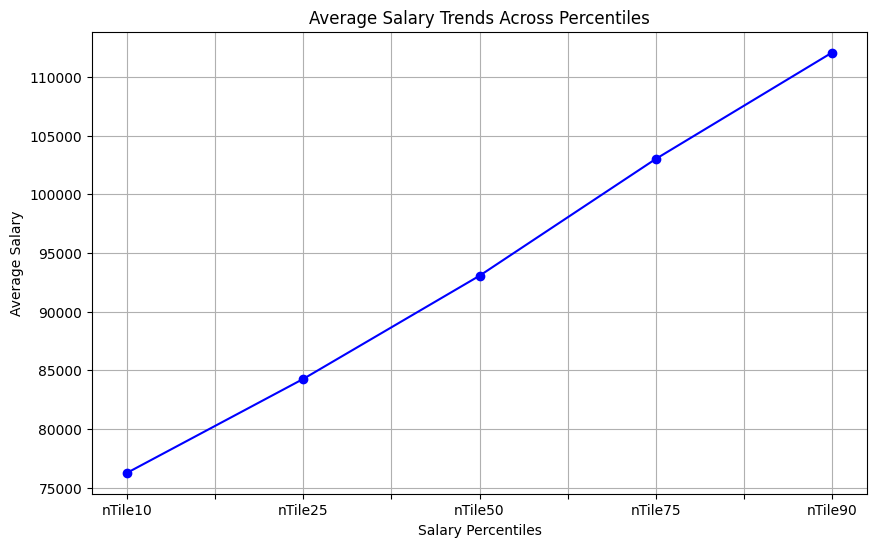

In [198]:
# Calculate average salary percentiles across the dataset
average_percentiles = clean_df[percentiles].mean()

# Line plot to visualize trends
plt.figure(figsize=(10, 6))
average_percentiles.plot(kind='line', marker='o', color='blue')
plt.title("Average Salary Trends Across Percentiles")
plt.xlabel("Salary Percentiles")
plt.ylabel("Average Salary")
plt.grid()
plt.show()


#### Compare Categories


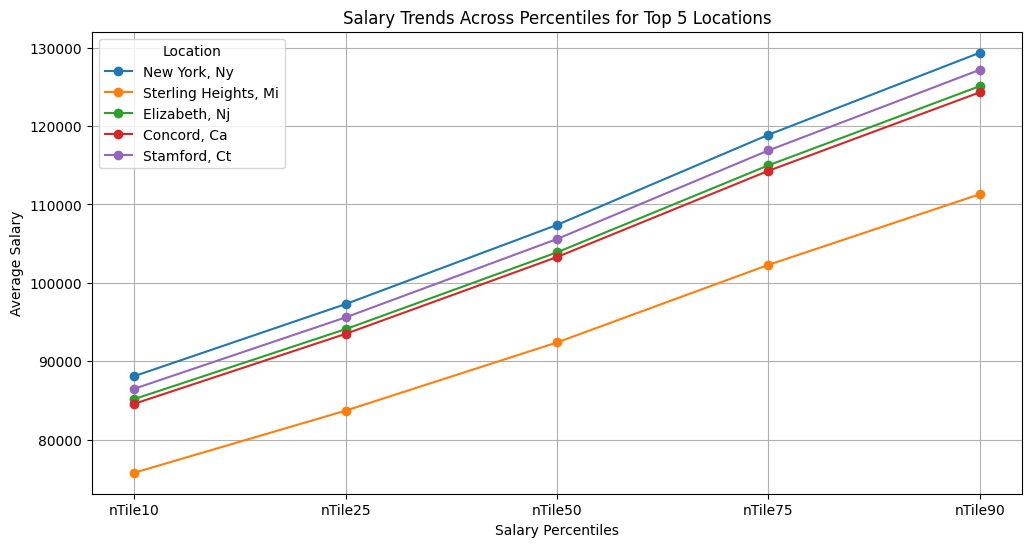

In [199]:
# Compare salary trends for the top 5 locations
top_5_locations = clean_df['Job Location'].value_counts().head(5).index
filtered_data = clean_df[clean_df['Job Location'].isin(top_5_locations)]

# Plot trends for top 5 locations
plt.figure(figsize=(12, 6))
for location in top_5_locations:
    subset = filtered_data[filtered_data['Job Location'] == location]
    plt.plot(percentiles, subset[percentiles].mean(), marker='o', label=location)

plt.title("Salary Trends Across Percentiles for Top 5 Locations")
plt.xlabel("Salary Percentiles")
plt.ylabel("Average Salary")
plt.legend(title="Location")
plt.grid()
plt.show()


In [200]:
# Calculate salary growth between nTile10 and nTile90 for each location
clean_df['Salary Growth'] = clean_df['nTile90'] - clean_df['nTile10']

# Sort by Salary Growth
growth_sorted = clean_df.sort_values(by='Salary Growth', ascending=False)
print(growth_sorted[['Job Location', 'Salary Growth']].head(10))


          Job Location  Salary Growth
9         San Jose, Ca          44514
89         Fremont, Ca          44514
204    Santa Clara, Ca          44514
164      Sunnyvale, Ca          44514
279      Daly City, Ca          44323
15   San Francisco, Ca          44323
286      San Mateo, Ca          43558
225       Berkeley, Ca          43176
155        Hayward, Ca          43176
44         Oakland, Ca          43176


#### Identifying High-Paying Locations or Job Titles

Top 10 High-Paying Locations:
Job Location
Sunnyvale, Ca        115390.0
Santa Clara, Ca      115390.0
San Jose, Ca         115390.0
Fremont, Ca          115190.0
Daly City, Ca        114990.0
San Francisco, Ca    114990.0
San Mateo, Ca        113390.0
Oakland, Ca          112190.0
Berkeley, Ca         112190.0
Hayward, Ca          111990.0
Name: nTile50, dtype: float64

Top 10 High-Paying Job Titles:
Job Title
Senior Accountant    93054.262295
Name: nTile50, dtype: float64


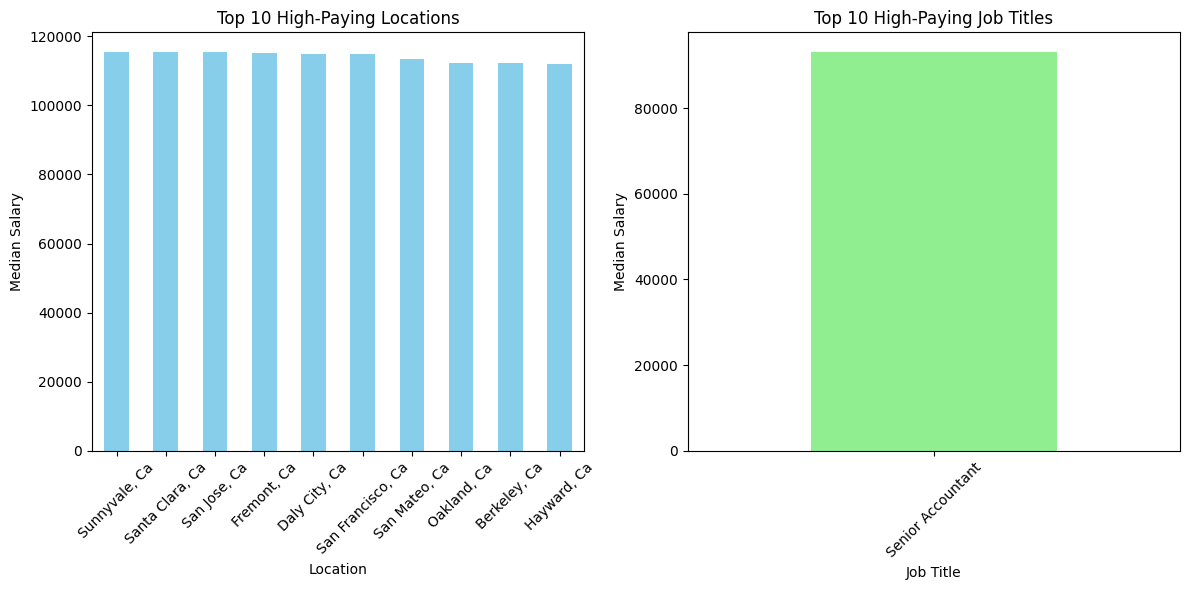

In [213]:
# Top 10 locations with the highest median salary
top_locations = clean_df.groupby('Job Location')['nTile50'].mean().sort_values(ascending=False).head(10)
print("Top 10 High-Paying Locations:")
print(top_locations)

# Top 10 job titles with the highest median salary
top_job_titles = clean_df.groupby('Job Title')['nTile50'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 High-Paying Job Titles:")
print(top_job_titles)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for locations
plt.subplot(1, 2, 1)
top_locations.plot(kind='bar', color='skyblue')
plt.title("Top 10 High-Paying Locations")
plt.xlabel("Location")
plt.ylabel("Median Salary")
plt.xticks(rotation=45)

# Plot for job titles
plt.subplot(1, 2, 2)
top_job_titles.plot(kind='bar', color='lightgreen')
plt.title("Top 10 High-Paying Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Median Salary")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Highlighting Salary Disparities Across Percentiles


Top 10 Locations with Largest Salary Disparity:
Job Location
Fremont, Ca          44514.0
Sunnyvale, Ca        44514.0
Santa Clara, Ca      44514.0
San Jose, Ca         44514.0
Daly City, Ca        44323.0
San Francisco, Ca    44323.0
San Mateo, Ca        43558.0
Oakland, Ca          43176.0
Hayward, Ca          43176.0
Berkeley, Ca         43176.0
Name: Salary Disparity, dtype: float64

Top 10 Job Titles with Largest Salary Disparity:
Job Title
Senior Accountant    35805.544262
Name: Salary Disparity, dtype: float64


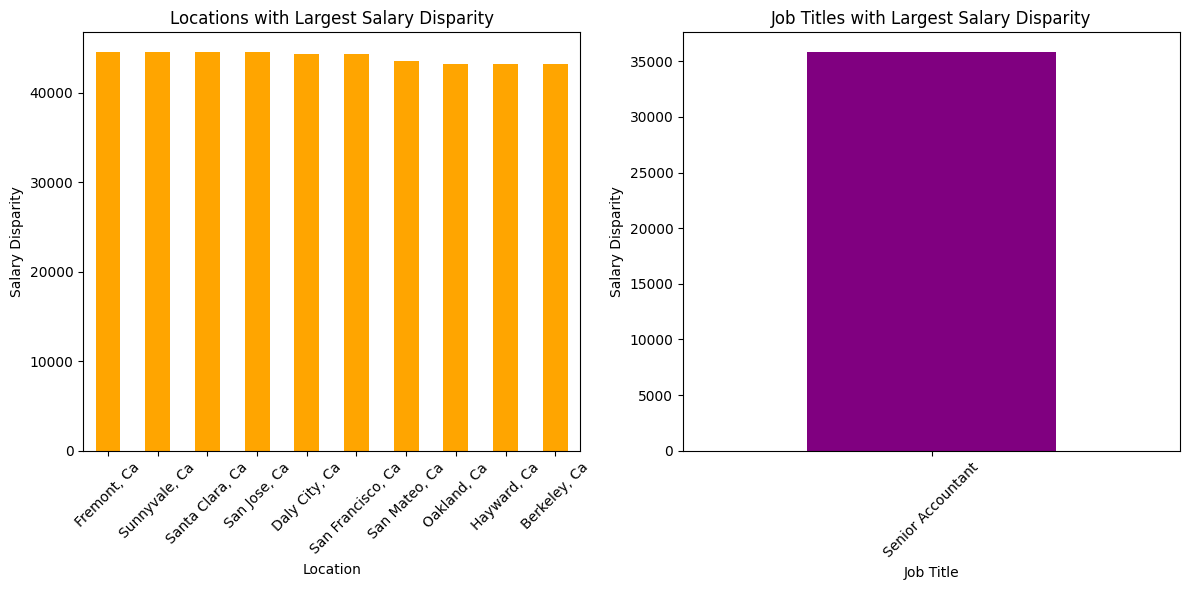

In [218]:
# Calculate salary disparity
clean_df['Salary Disparity'] = clean_df['nTile90'] - clean_df['nTile10']

# Top 10 locations with the largest disparity
top_disparity_locations = clean_df.groupby('Job Location')['Salary Disparity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Locations with Largest Salary Disparity:")
print(top_disparity_locations)

# Top 10 job titles with the largest disparity
top_disparity_job_titles = clean_df.groupby('Job Title')['Salary Disparity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Job Titles with Largest Salary Disparity:")
print(top_disparity_job_titles)

# Visualization
plt.figure(figsize=(12, 6))

# Plot for locations
plt.subplot(1, 2, 1)
top_disparity_locations.plot(kind='bar', color='orange')
plt.title("Locations with Largest Salary Disparity")
plt.xlabel("Location")
plt.ylabel("Salary Disparity")
plt.xticks(rotation=45)

# Plot for job titles
plt.subplot(1, 2, 2)
top_disparity_job_titles.plot(kind='bar', color='purple')
plt.title("Job Titles with Largest Salary Disparity")
plt.xlabel("Job Title")
plt.ylabel("Salary Disparity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


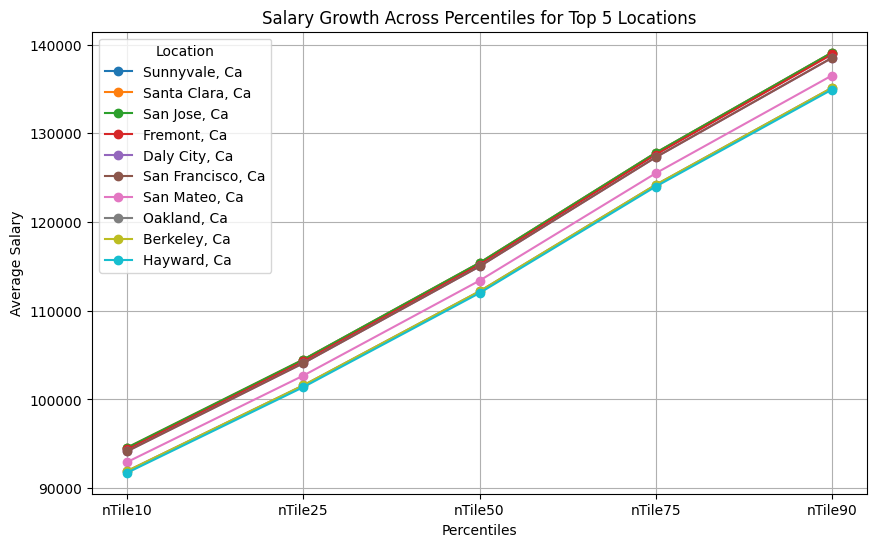

In [232]:
# Calculate average growth between percentiles for top locations
top_5_locations = top_locations.index
location_percentiles = clean_df[clean_df['Job Location'].isin(top_5_locations)]

# Plot salary growth trends
plt.figure(figsize=(10, 6))
for location in top_5_locations:
    subset = location_percentiles[location_percentiles['Job Location'] == location]
    plt.plot(percentiles, subset[percentiles].mean(), marker='o', label=location)

plt.title("Salary Growth Across Percentiles for Top 5 Locations")
plt.xlabel("Percentiles")
plt.ylabel("Average Salary")
plt.legend(title="Location")
plt.grid()
plt.show()
